# Basic plot operations in Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Simple 2 variable plots

Setup a couple of simple dataframes

In [2]:
df2 = pd.DataFrame({'X':[0,1,2,3,4,5,6,7,8], 'Y':[0,1,4,9,16,25,36,49,64]})
df3 = pd.DataFrame({'X':[0,1,2,3,4,5,6,7,8], 'Y':[0,1,8,27,64,125,216,343,512]})

### Scatterplot

Make a scatter plot in seaborn, note that most plots in seaborn take a dataframe as an argument and you simply supply the column names you want in the plot.

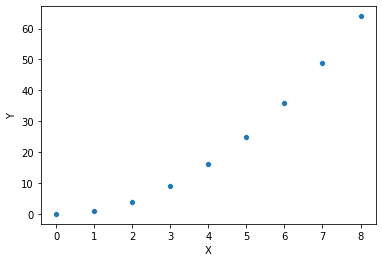

In [3]:
sns.scatterplot(data=df2, x='X', y='Y')

### Line plot

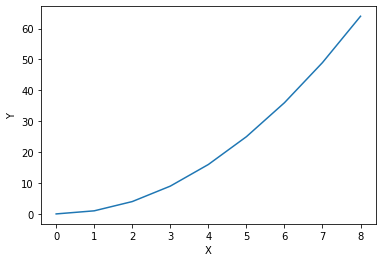

In [4]:
sns.lineplot(data=df2, x='X', y='Y')

### Bar plot

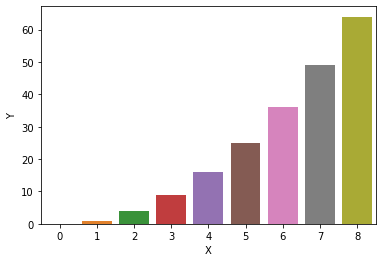

In [5]:
sns.barplot(data=df2, x='X', y='Y')

## Adjusting plot parameters

### Labels and limits

Let's add some labels and adjust the axis limits

Text(0, 0.5, 'Squares')

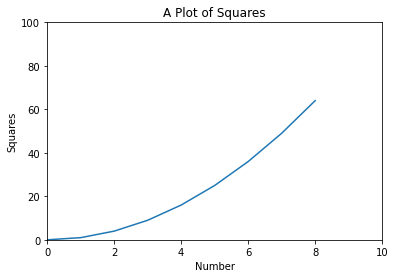

In [6]:
sns.lineplot(data=df2, x='X', y='Y')

plt.xlim([0,10])
plt.ylim([0,100])
plt.title('A Plot of Squares')
plt.xlabel('Number')
plt.ylabel('Squares')

### Figure size

Let's make the figure a bit bigger, in order to do so we have to use matplotlib's figure before our plot call.

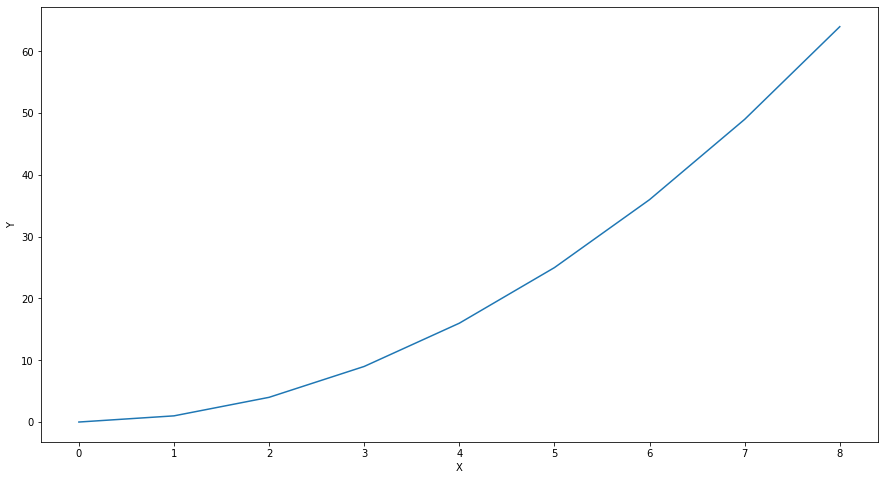

In [38]:
plt.figure(figsize=[15,8])
sns.lineplot(data=df2, x='X', y='Y')

### Overlaying multiple plots

Let's plot two things on top of each other, to do so just call the plotting function twice.  We can use plt.legend to add a figure legend.

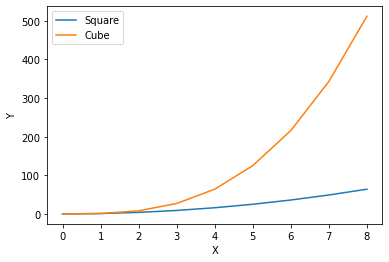

In [9]:
sns.lineplot(data=df2, x='X', y='Y')
sns.lineplot(data=df3, x='X', y='Y')

plt.legend(labels=['Square', 'Cube'])

## Histograms

Let's make a new dataframe with two columns, each having a normal distribution of random values but with different widths/centers.

In [10]:
df=pd.DataFrame({'Norm1':np.random.normal(4,1,1000), 'Norm2':np.random.normal(3,3,1000)})

Use distplot to plot.  Note this plot just takes a list/numpy array/or Series of values, it does not take the full dataframe.

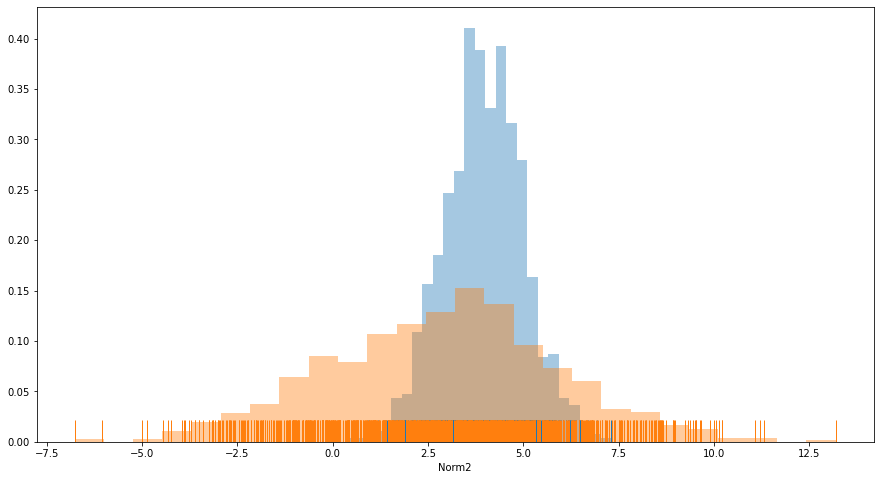

In [22]:
plt.figure(figsize=[15,8])
sns.distplot(df['Norm1'], kde=False, norm_hist=True, rug=True)
sns.distplot(df['Norm2'], kde=False, norm_hist=True, rug=True)



In [16]:
sns.distplot?